In [18]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as nb
import seaborn as sns
import plotly.express as px
import warnings
import numpy as np  
warnings.filterwarnings('ignore')

In [19]:
cd notebook/

[WinError 2] The system cannot find the file specified: 'notebook/'
d:\ML\LiveProject\ML-FraudDetection\notebook


In [20]:
df = pd.read_csv('insuranceFraud.csv')

In [21]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [23]:
df['authorities_contacted']

0      Police
1      Police
2      Police
3      Police
4         NaN
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object

In [24]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [25]:
# Check for '?' in any column
df_contains_question_mark = df.apply(lambda x: x.str.contains('\?').any() if x.dtype == 'object' else False)
print(df_contains_question_mark)
rows_with_question_mark = df[df.apply(lambda x: x.str.contains('\?').any(), axis=1)]
print(rows_with_question_mark)

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p


     months_as_customer  age  policy_number policy_bind_date policy_state  \
1                   228   42         342868        6/27/2006           IN   
3                   256   41         227811        5/25/1990           IL   
4                   228   44         367455         6/6/2014           IL   
6                   137   34         413978         6/4/2000           IN   
7                   165   37         429027         2/3/1990           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851        7/16/1991           OH   
996                 285   41         186934         1/5/2014           IL   
997                 130   34         918516        2/17/2003           OH   
998                 458   62         533940       11/18/2011           IL   
999                 456   60         556080       11/11/1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  

In [26]:
df_contains_question_mark = df.apply(lambda x: x.str.contains('\?').any() if x.dtype == 'object' else False)
print(df_contains_question_mark)


months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [27]:
rows_with_question_mark = df[df.apply(lambda x: x.str.contains('\?').any(), axis=1)]
print(rows_with_question_mark)

     months_as_customer  age  policy_number policy_bind_date policy_state  \
1                   228   42         342868        6/27/2006           IN   
3                   256   41         227811        5/25/1990           IL   
4                   228   44         367455         6/6/2014           IL   
6                   137   34         413978         6/4/2000           IN   
7                   165   37         429027         2/3/1990           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851        7/16/1991           OH   
996                 285   41         186934         1/5/2014           IL   
997                 130   34         918516        2/17/2003           OH   
998                 458   62         533940       11/18/2011           IL   
999                 456   60         556080       11/11/1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \

In [28]:
rows_with_question_mark

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
6,137,34,413978,6/4/2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,2/3/1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [29]:
rows_with_question_mark = df[df.apply(lambda x: x.str.contains('\?').any(), axis=1)]


In [30]:
rows_with_question_mark

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
6,137,34,413978,6/4/2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,2/3/1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [31]:
data = df.replace('?', np.nan)

In [32]:
rows_with_question_mark = data[data.apply(lambda x: x.str.contains('\?').any(), axis=1)]
print(rows_with_question_mark)

Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported]
Index: []

[0 rows x 39 columns]


In [33]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [34]:
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [35]:
data.drop(columns=cols_to_drop,inplace=True)

In [36]:
len(data.columns)

27

In [37]:
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [38]:
data.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [41]:
data['collision_type']=imputer.fit_transform (data[['collision_type']]).reshape(-1)
data['property_damage']=imputer.fit_transform(data[['property_damage']]).reshape(-1)
data['police_report_available']=imputer.fit_transform(data[['police_report_available']]).reshape(-1)
data['authorities_contacted']=imputer.fit_transform(data[['authorities_contacted']]).reshape(-1)

In [42]:
data.isna().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [44]:
cat_df = data.select_dtypes(include='object').copy()

In [45]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [46]:
cat_df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [47]:
cat_df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [48]:
cat_df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [49]:
cat_df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [50]:
cat_df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [51]:
cat_df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [52]:
cat_df['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [53]:
cat_df['authorities_contacted'].unique()

array(['Police', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [54]:
cat_df['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [55]:
cat_df['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [56]:
cat_df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [57]:
# custom mapping for encoding
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [58]:
for col in cat_df.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [59]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1,2.5,1,6,2,0,0,1,False,False,False,...,False,False,False,False,True,True,False,False,False,True
2,1.0,0,7,2,0,0,0,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,2.5,0,7,3,0,0,1,True,False,False,...,True,False,False,True,False,False,False,False,False,True
4,5.0,1,5,2,0,0,0,False,False,False,...,True,False,False,False,True,True,False,False,False,True


In [60]:
num_df = data.select_dtypes(include=['int64']).copy()

In [61]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [62]:
final_df = pd.concat([num_df,cat_df],axis=1)

In [63]:
X=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported']

In [64]:
# Convert boolean columns to numerical columns
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [65]:
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [66]:
X.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,0,1,0,0,1,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,0,1,1,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,0,1,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,1,0,0,1,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,1,0,0,0,1,1,0,0,0,1


In [67]:
def hisplost(data,col):
    plt.hist(data)
    plt.title(col)
    plt.show()

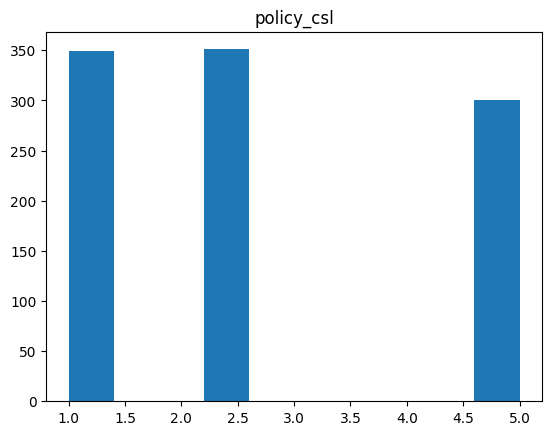

In [68]:
hisplost(final_df['policy_csl'], 'policy_csl')

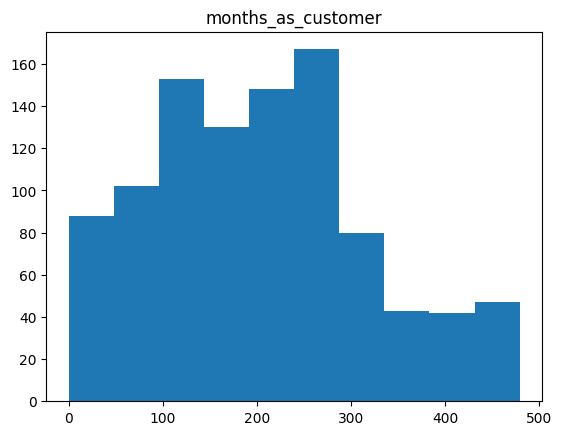

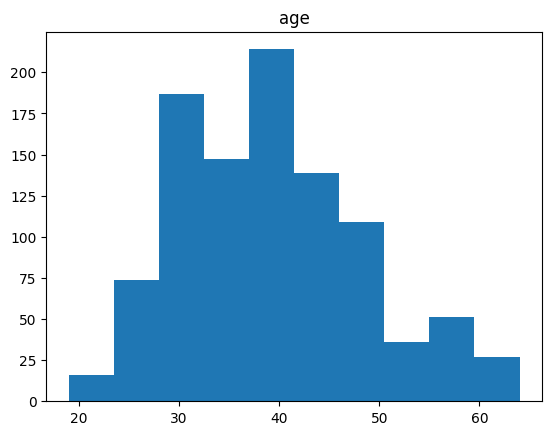

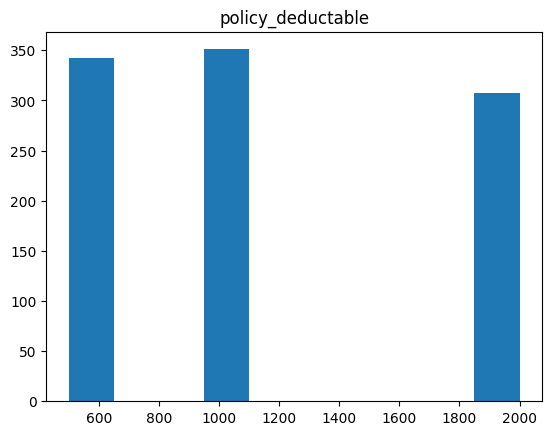

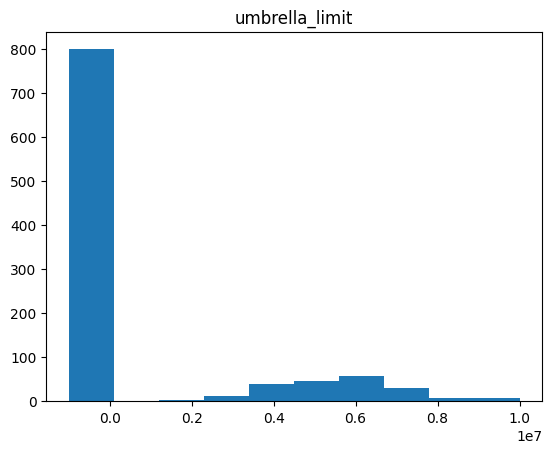

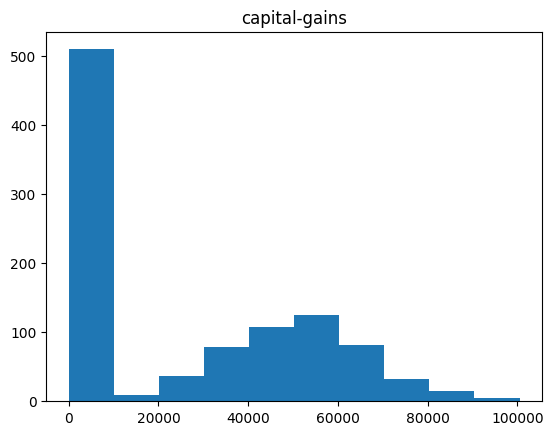

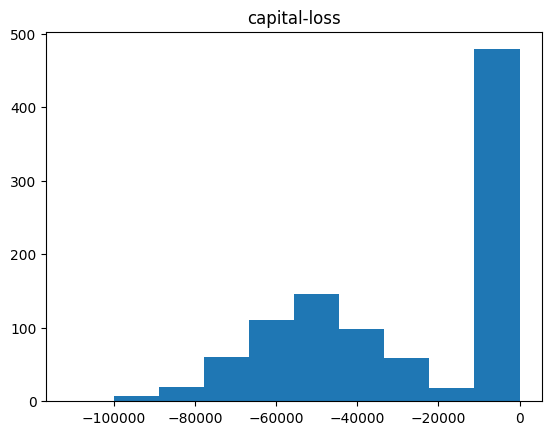

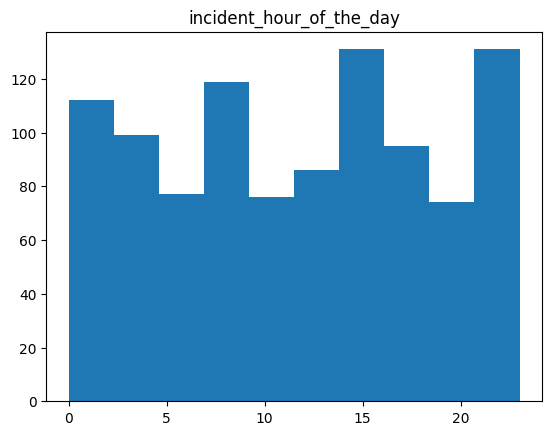

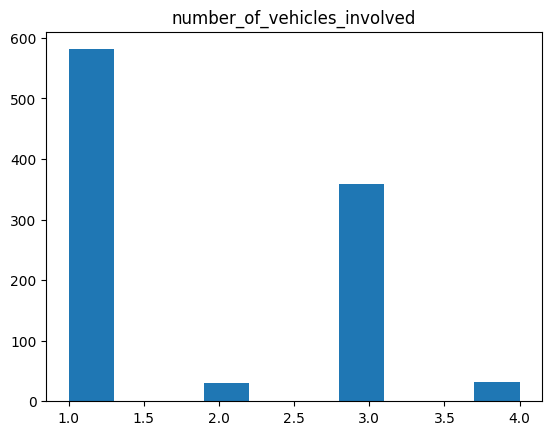

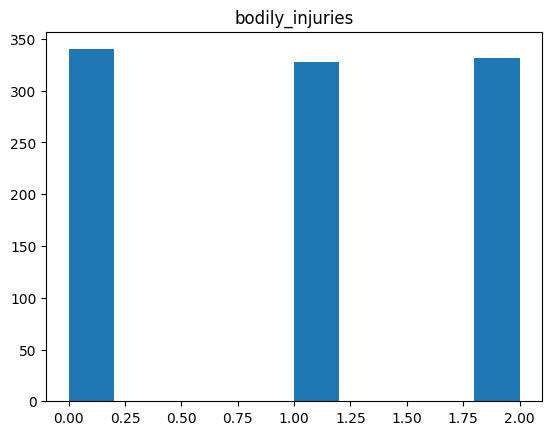

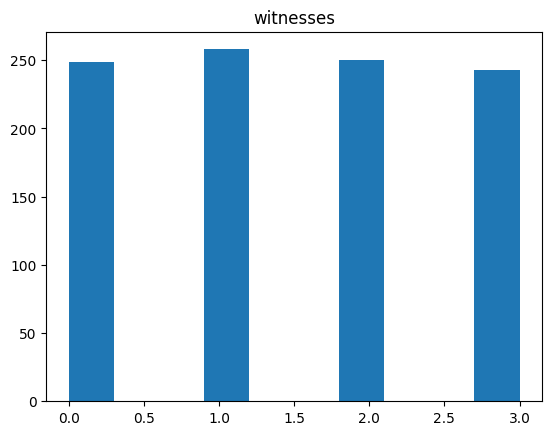

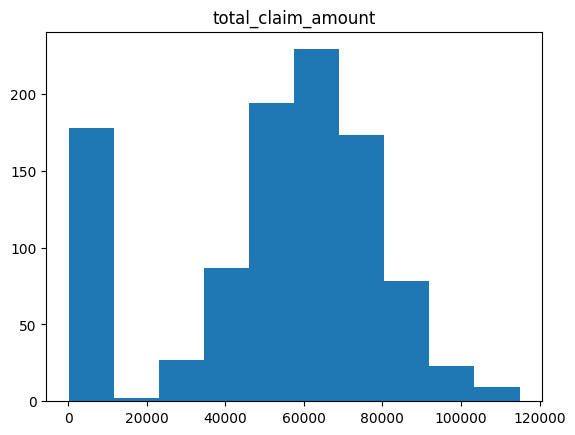

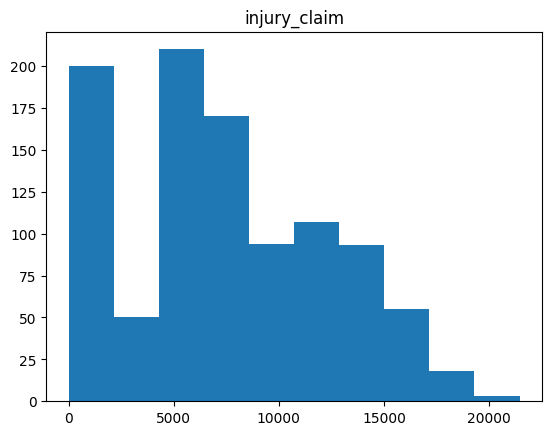

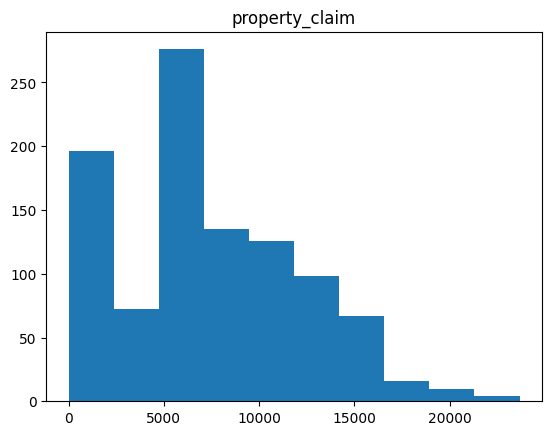

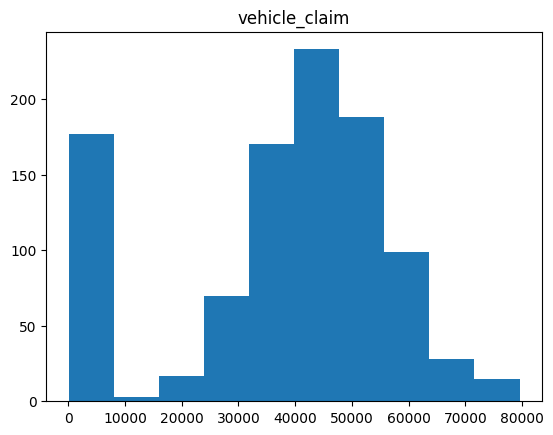

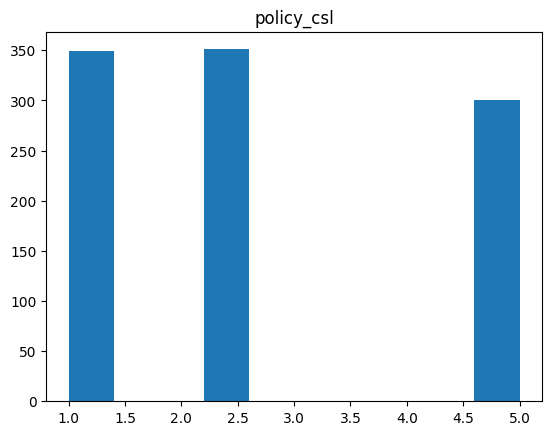

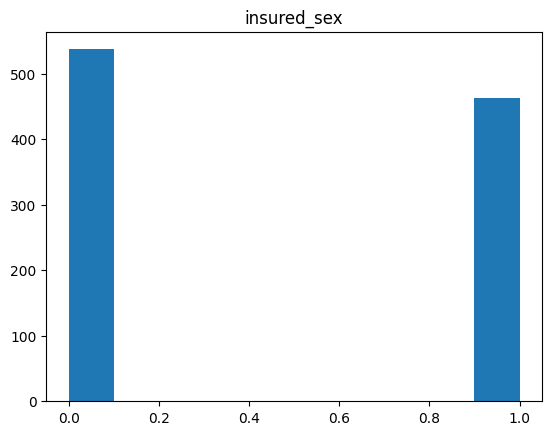

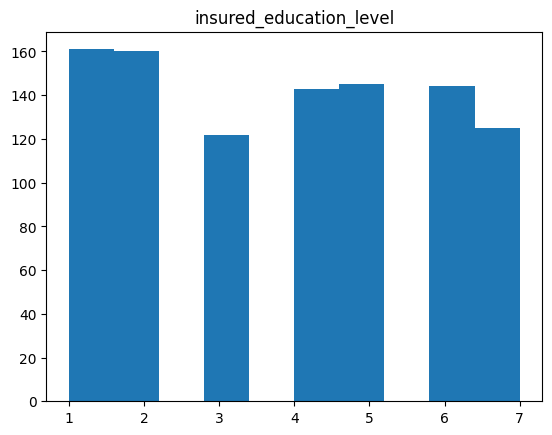

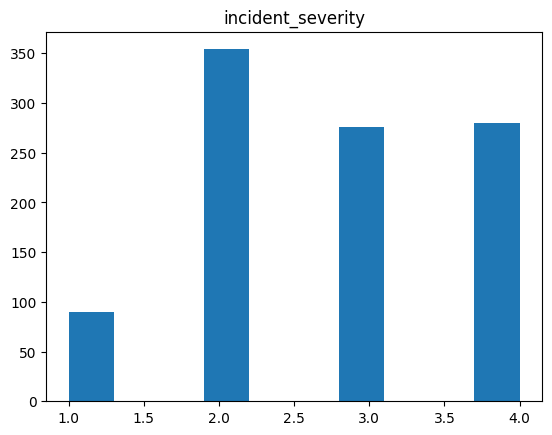

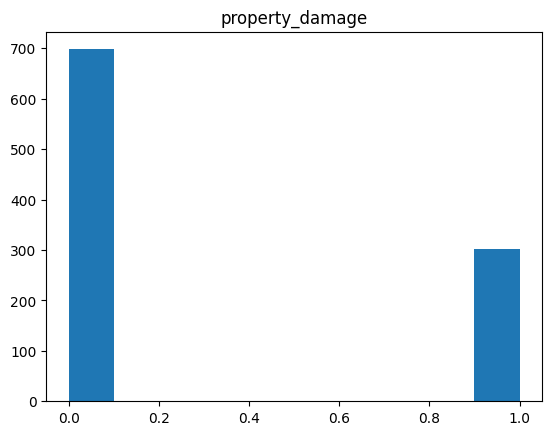

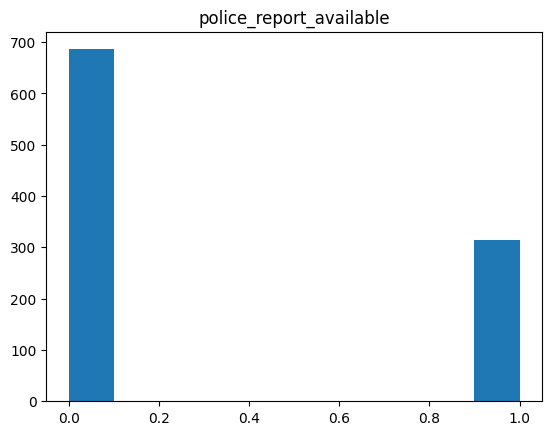

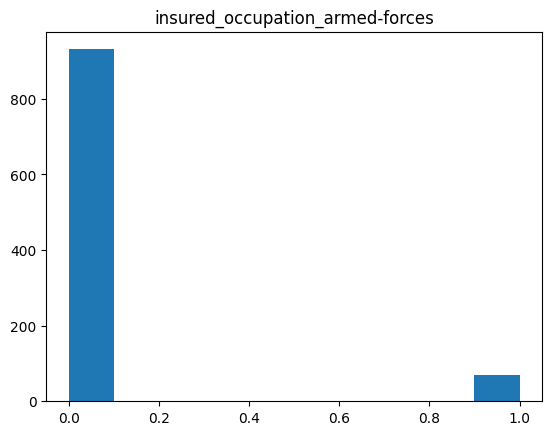

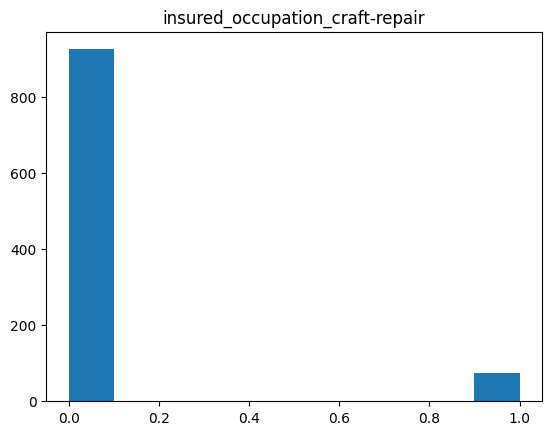

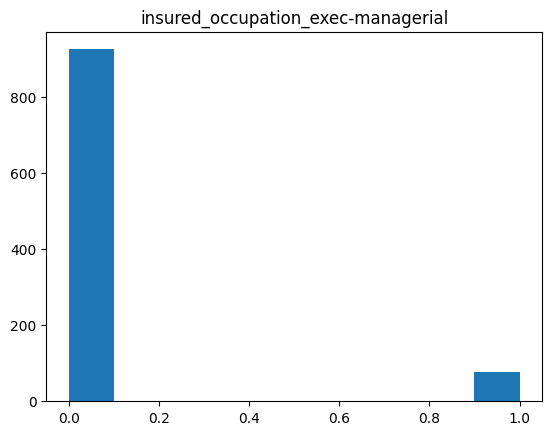

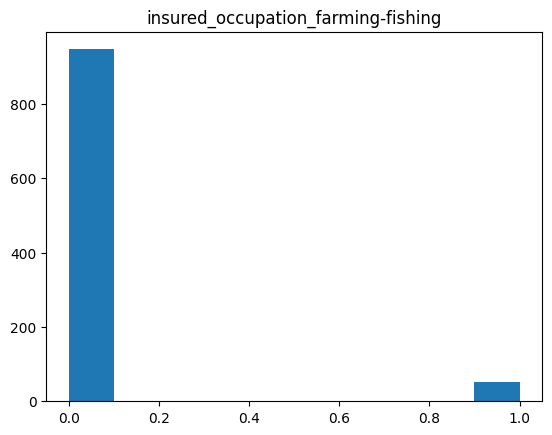

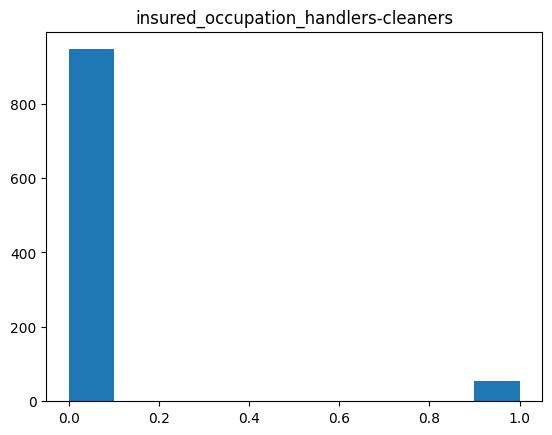

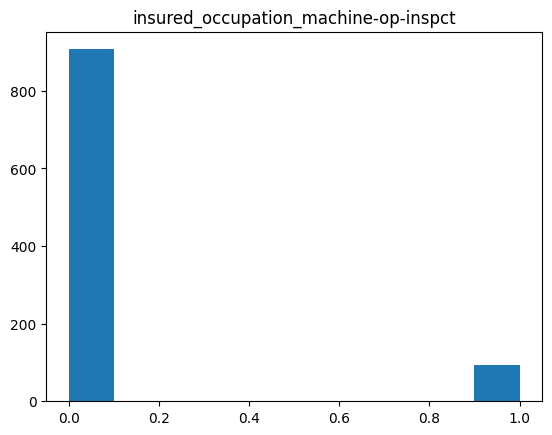

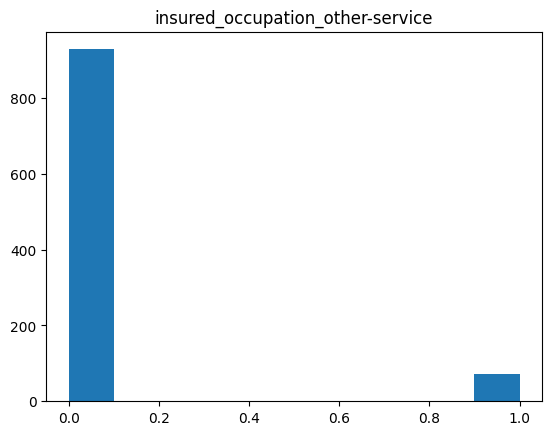

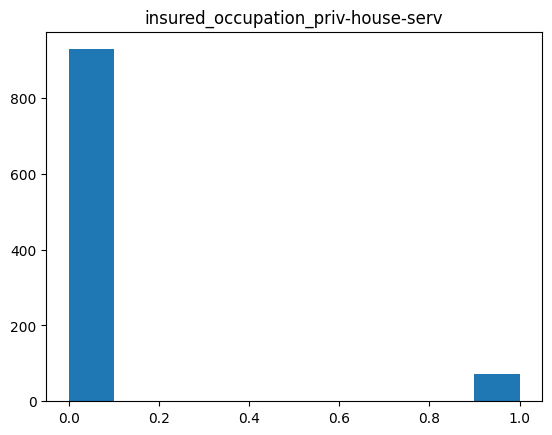

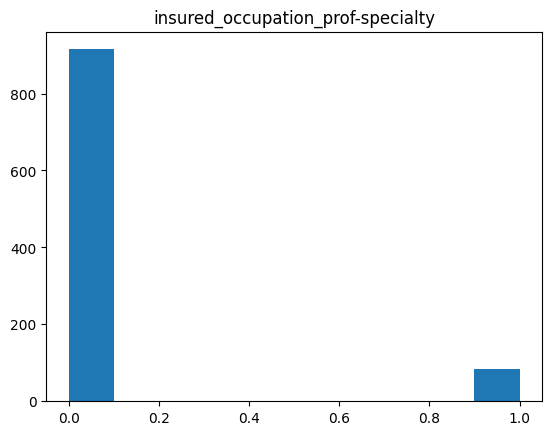

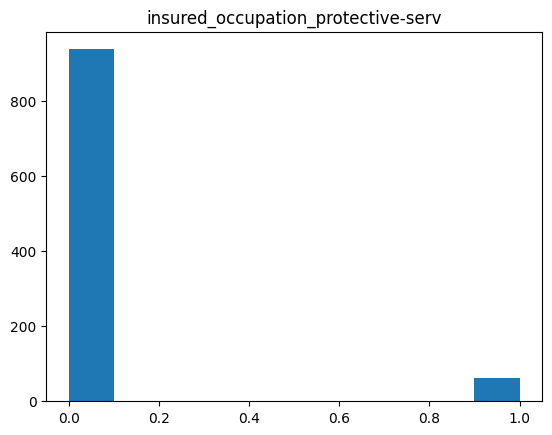

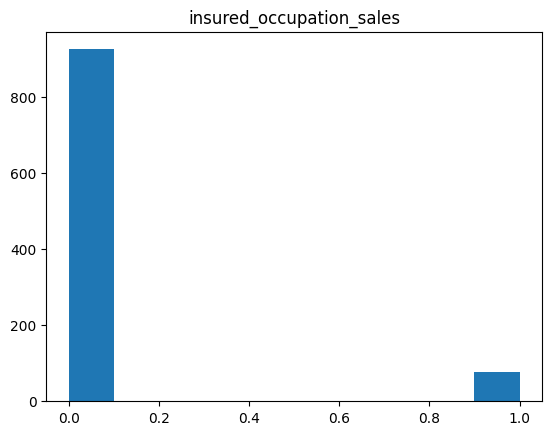

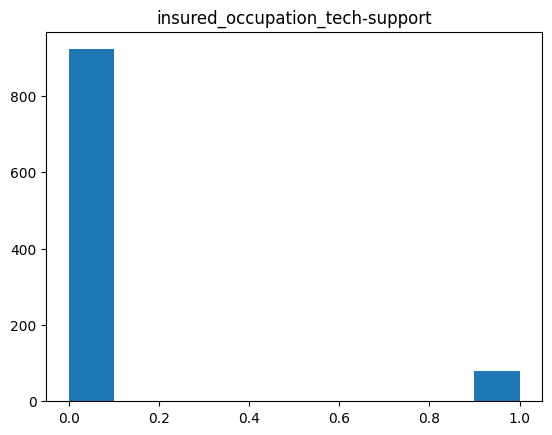

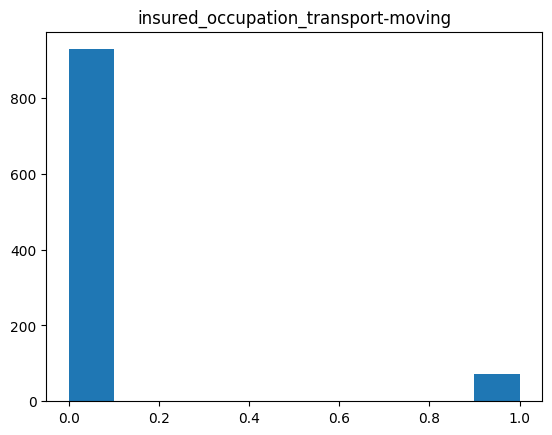

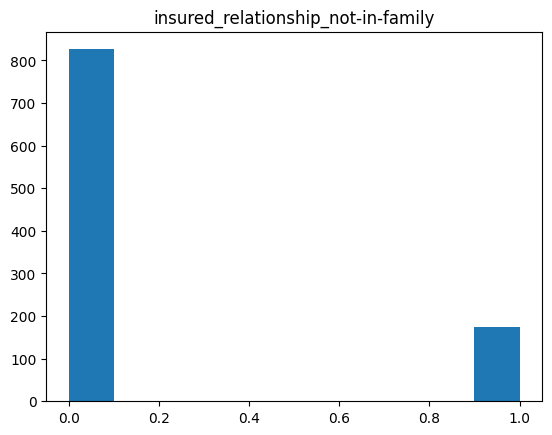

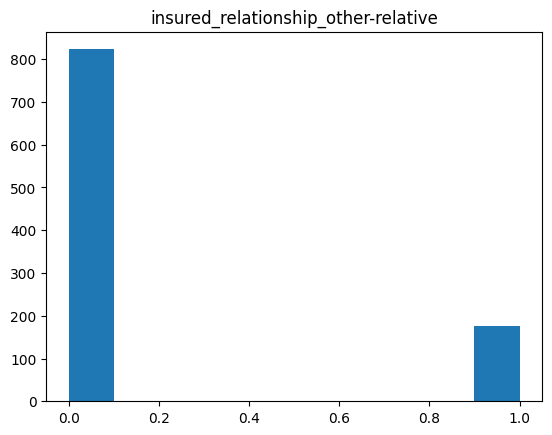

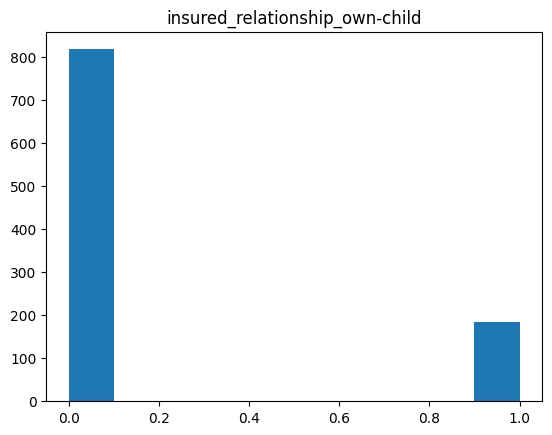

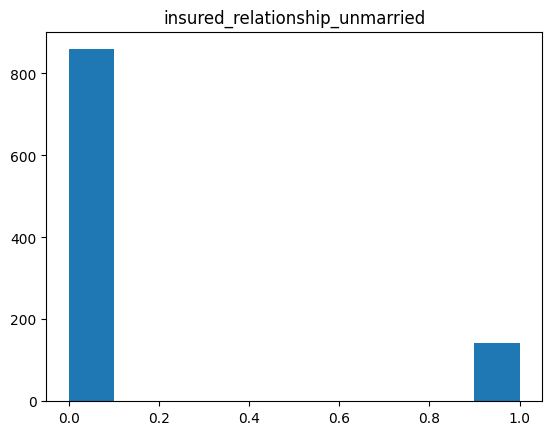

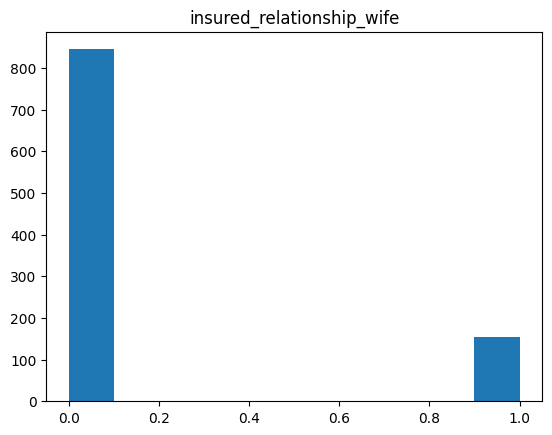

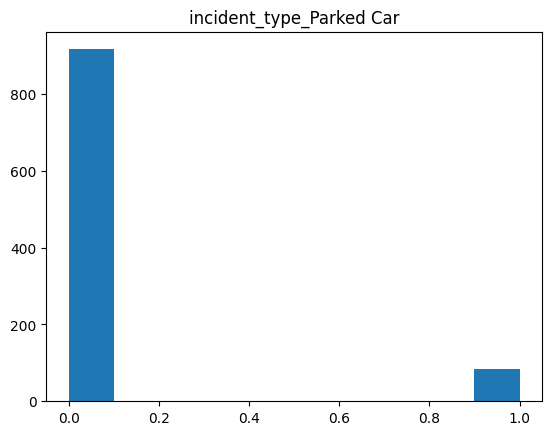

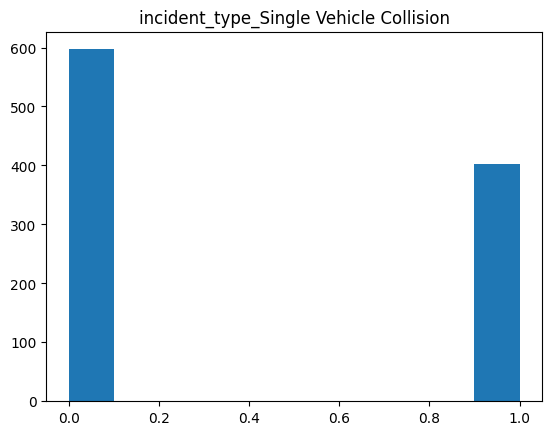

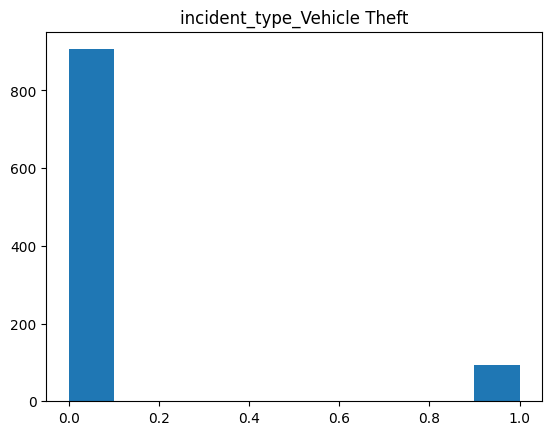

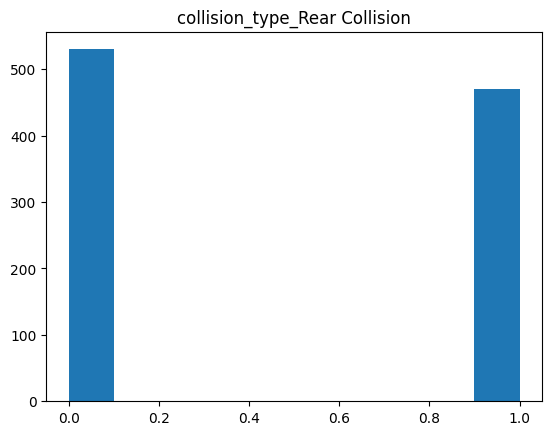

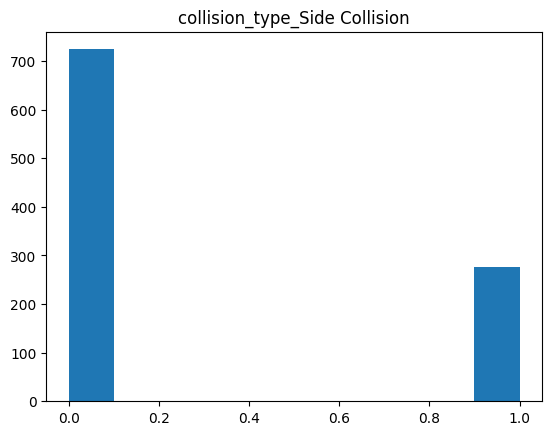

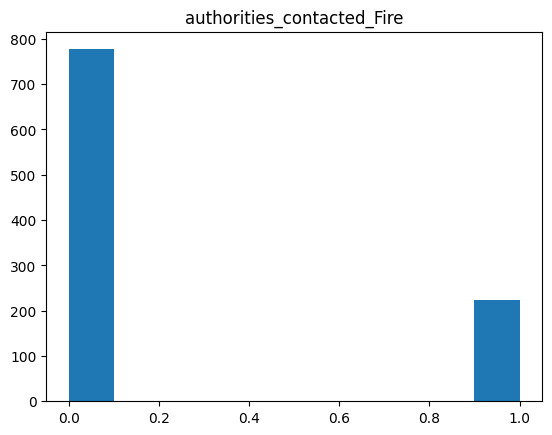

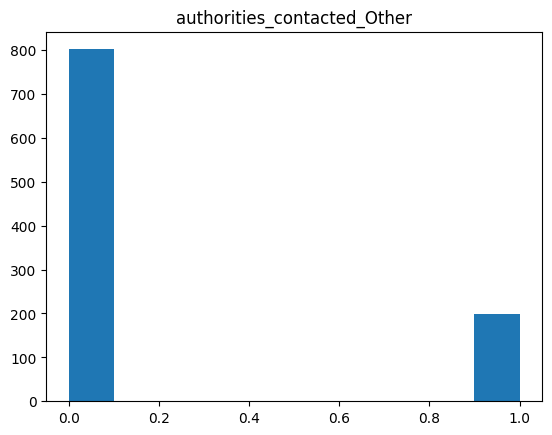

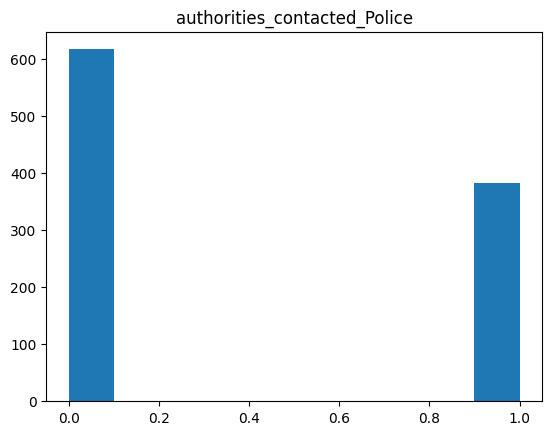

In [69]:
for col in X.columns:
    hisplost(X[col], col)


In [70]:
X.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   age                                     1000 non-null   int64  
 2   policy_deductable                       1000 non-null   int64  
 3   umbrella_limit                          1000 non-null   int64  
 4   capital-gains                           1000 non-null   int64  
 5   capital-loss                            1000 non-null   int64  
 6   incident_hour_of_the_day                1000 non-null   int64  
 7   number_of_vehicles_involved             1000 non-null   int64  
 8   bodily_injuries                         1000 non-null   int64  
 9   witnesses                               1000 non-null   int64  
 10  total_claim_amount                      1000 non-null   int64

In [72]:
X

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,0,1,0,0,1,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,0,1,1,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,0,1,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,1,0,0,1,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,0,0,0,20,1,0,1,...,1,0,0,1,0,0,0,1,0,0
996,285,41,1000,0,70900,0,23,1,2,3,...,0,1,0,1,0,1,0,1,0,0
997,130,34,500,3000000,35100,0,4,3,2,3,...,0,0,0,0,0,0,1,0,0,1
998,458,62,2000,5000000,0,0,2,1,0,1,...,0,1,0,1,0,1,0,0,1,0


(array([753.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 247.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

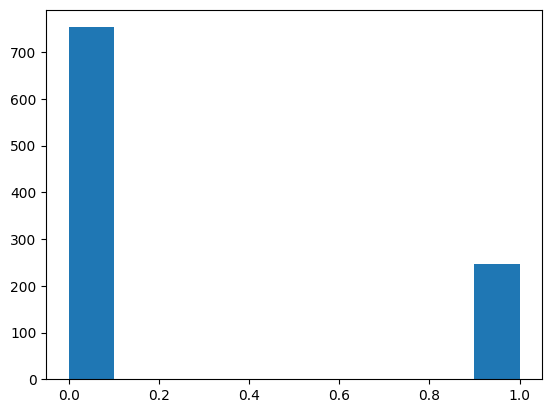

In [73]:
plt.hist(y)

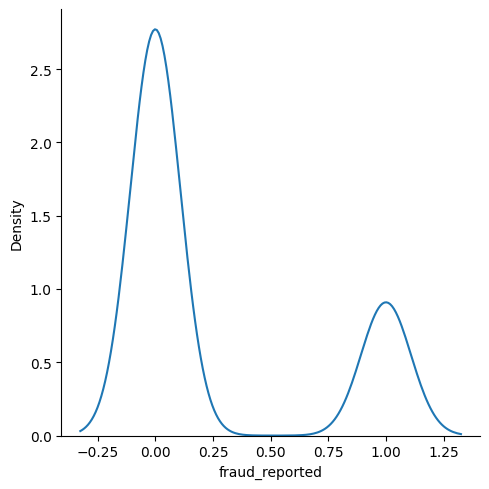

In [74]:
sns.displot(y, kind='kde',)

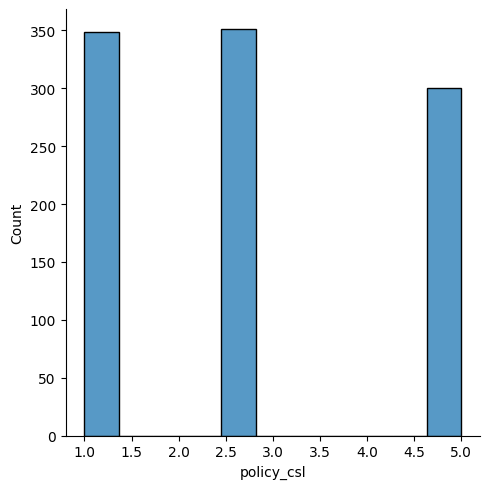

In [75]:
sns.displot(X['policy_csl'],)

<Axes: xlabel='months_as_customer', ylabel='age'>

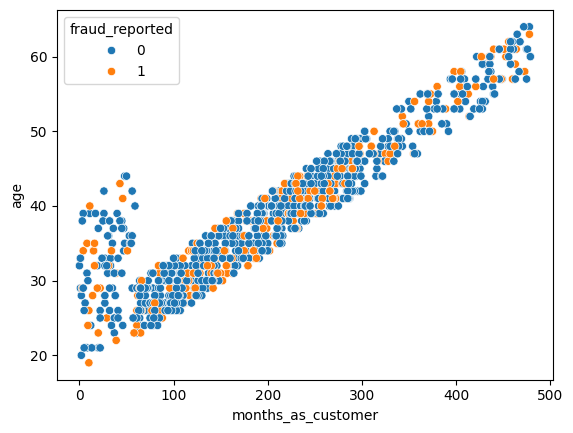

In [76]:
sns.scatterplot(data=final_df, x = final_df['months_as_customer'], y=final_df['age'],hue= final_df['fraud_reported'])

<Axes: >

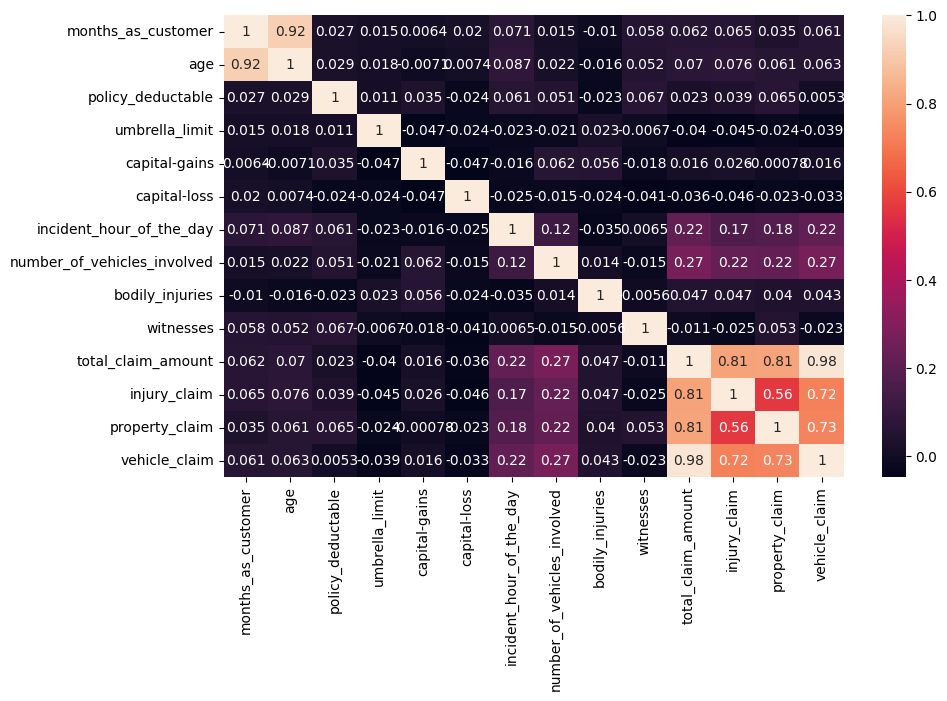

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True)

In [78]:
X.drop(columns=['age','total_claim_amount'], inplace=True)

In [79]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,y, random_state=355 )

In [80]:
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
65,254,500,0,35700,0,6,3,2,2,13720,...,0,0,0,0,0,0,0,0,0,0
244,95,1000,0,0,-70300,3,1,1,2,640,...,0,0,0,0,1,1,0,0,0,1
595,56,500,0,0,-28800,13,1,1,2,0,...,0,0,0,1,0,1,0,0,0,1
873,322,2000,0,0,-46000,18,1,0,2,7680,...,0,0,0,1,0,1,0,0,0,0
631,147,1000,6000000,0,-48400,2,2,1,2,9760,...,0,0,0,0,0,1,0,0,1,0


In [81]:
num_df=train_x[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [82]:
num_df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [83]:
print(train_x.shape)
print(num_df.shape)

(750, 44)
(750, 12)


In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [85]:
scaled_data=scaler.fit_transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns,index=train_x.index)
scaled_num_df.shape

(750, 12)

In [86]:
train_x.drop(columns=scaled_num_df.columns, inplace=True)

In [87]:
scaled_num_df.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [88]:
train_x=pd.concat([scaled_num_df,train_x],axis=1)

In [89]:
train_x

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
65,0.435244,-1.037803,-0.468878,0.385876,0.975789,-0.819548,1.162385,1.271286,0.431860,1.285251,...,0,0,0,0,0,0,0,0,0,0
244,-0.930728,-0.209769,-0.468878,-0.904442,-1.546393,-1.248282,-0.812221,0.034626,0.431860,-1.393623,...,0,0,0,0,1,1,0,0,0,1
595,-1.265778,-1.037803,-0.468878,-0.904442,-0.057480,0.180830,-0.812221,0.034626,0.431860,-1.524700,...,0,0,0,1,0,1,0,0,0,1
873,1.019433,1.446300,-0.468878,-0.904442,-0.674572,0.895386,-0.812221,-1.202033,0.431860,0.048217,...,0,0,0,1,0,1,0,0,0,0
631,-0.483995,-0.209769,2.171861,-0.904442,-0.760678,-1.391193,0.175082,0.034626,0.431860,0.474215,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-1.240005,1.446300,-0.468878,1.415961,-0.183051,-1.677015,1.162385,-1.202033,0.431860,-0.351156,...,0,0,0,0,0,0,0,0,0,0
501,-1.523508,-0.209769,-0.468878,-0.904442,-0.950828,-1.677015,-0.812221,-1.202033,0.431860,0.515177,...,0,0,0,1,0,0,1,0,0,1
346,1.938672,-0.209769,2.171861,1.531620,-0.595642,-1.677015,-0.812221,1.271286,-1.392902,-0.177071,...,0,0,0,1,0,1,0,0,0,0
642,-0.518359,-0.209769,-0.468878,1.983412,0.975789,-1.534104,-0.812221,1.271286,-1.392902,-0.365493,...,0,0,0,1,0,1,0,0,0,0


In [90]:
from sklearn.svm import SVC
sv_classifier=SVC()

In [91]:
y_pred = sv_classifier.fit(train_x, train_y).predict(test_x)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
sc=accuracy_score(test_y,y_pred)
sc

0.728

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {"kernel": ['rbf','sigmoid'],
             "C":[0.1,0.5,1.0],
             "random_state":[0,100,200,300]}

In [96]:
grid = GridSearchCV(estimator=sv_classifier, param_grid=param_grid, cv=5,  verbose=3)

In [97]:
grid.fit(train_x, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.760 total time=   0.0s
[CV 2/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.760 total time=   0.0s
[CV 3/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.760 total time=   0.0s
[CV 4/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.760 total time=   0.0s
[CV 5/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.767 total time=   0.0s
[CV 1/5] END C=0.1, kernel=rbf, random_state=100;, score=0.760 total time=   0.0s
[CV 2/5] END C=0.1, kernel=rbf, random_state=100;, score=0.760 total time=   0.0s
[CV 3/5] END C=0.1, kernel=rbf, random_state=100;, score=0.760 total time=   0.0s
[CV 4/5] END C=0.1, kernel=rbf, random_state=100;, score=0.760 total time=   0.0s
[CV 5/5] END C=0.1, kernel=rbf, random_state=100;, score=0.767 total time=   0.0s
[CV 1/5] END C=0.1, kernel=rbf, random_state=200;, score=0.760 total time=   0.0s
[CV 2/5] END C=0.1, kernel=rbf, random_st

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0], 'kernel': ['rbf', 'sigmoid'],
                         'random_state': [0, 100, 200, 300]},
             verbose=3)

In [98]:
from xgboost import XGBClassifier

In [99]:
xgb=XGBClassifier()

In [100]:
y_pred = xgb.fit(train_x, train_y).predict(test_x)

In [101]:
ac2=accuracy_score(test_y,y_pred)
ac2

0.748

In [102]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

            #Creating an object of the Grid Search class
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)

In [103]:
grid.fit(train_x, train_y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': [10, 50, 100, 130]},
             verbose=3)

In [104]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, ...)

In [105]:
from fraud_detection.constants import SCHEMA_FILE_PATH
from fraud_detection.utils.main_utils import read_yaml_file, write_yaml_file

In [106]:
read_yaml_file(file_path=SCHEMA_FILE_PATH)

ExceptionHandle: Error occurred python script name [d:\ml\liveproject\ml-frauddetection\fraud_detection\utils\main_utils.py] line number [15] error message [[Errno 2] No such file or directory: 'config\\schema.yaml']

In [107]:
train_x

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police
65,0.435244,-1.037803,-0.468878,0.385876,0.975789,-0.819548,1.162385,1.271286,0.431860,1.285251,...,0,0,0,0,0,0,0,0,0,0
244,-0.930728,-0.209769,-0.468878,-0.904442,-1.546393,-1.248282,-0.812221,0.034626,0.431860,-1.393623,...,0,0,0,0,1,1,0,0,0,1
595,-1.265778,-1.037803,-0.468878,-0.904442,-0.057480,0.180830,-0.812221,0.034626,0.431860,-1.524700,...,0,0,0,1,0,1,0,0,0,1
873,1.019433,1.446300,-0.468878,-0.904442,-0.674572,0.895386,-0.812221,-1.202033,0.431860,0.048217,...,0,0,0,1,0,1,0,0,0,0
631,-0.483995,-0.209769,2.171861,-0.904442,-0.760678,-1.391193,0.175082,0.034626,0.431860,0.474215,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-1.240005,1.446300,-0.468878,1.415961,-0.183051,-1.677015,1.162385,-1.202033,0.431860,-0.351156,...,0,0,0,0,0,0,0,0,0,0
501,-1.523508,-0.209769,-0.468878,-0.904442,-0.950828,-1.677015,-0.812221,-1.202033,0.431860,0.515177,...,0,0,0,1,0,0,1,0,0,1
346,1.938672,-0.209769,2.171861,1.531620,-0.595642,-1.677015,-0.812221,1.271286,-1.392902,-0.177071,...,0,0,0,1,0,1,0,0,0,0
642,-0.518359,-0.209769,-0.468878,1.983412,0.975789,-1.534104,-0.812221,1.271286,-1.392902,-0.365493,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
print(len(y))
print((y == 1).sum())

In [113]:
print((y == 1).sum())

247


In [110]:
len(x)

1000

In [114]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'fraud_reported', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_unmarried', 'insured_relationship_wife',
       'incident_type_Parked Car', 'incident_type_Single Vehicle Collision',
       'incident_ty

In [116]:
cat_df1 = data.select_dtypes(include='object').copy()

In [117]:
cat_df1.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [ ]:
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [120]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

In [125]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])



In [122]:
num_df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [139]:
or_columns =['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available']
oh_columns = ['insured_occupation','insured_relationship','incident_type','collision_type','authorities_contacted']
num_features =['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim']

In [ ]:
'insured_occupation',

In [135]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [141]:
da = data.copy()

In [142]:
dat = preprocessor.fit_transform(da)

In [143]:
dat

array([[ 1.        ,  0.        ,  0.        , ..., -0.18928317,
         1.16550497,  0.74965272],
       [ 0.        ,  0.        ,  1.        , ..., -1.36382194,
        -1.37269599, -1.82334593],
       [ 0.        ,  0.        ,  0.        , ...,  0.05464372,
        -0.73607206, -0.78556451],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.01364761,
         0.0208261 ,  0.77190224],
       [ 0.        ,  0.        ,  0.        , ..., -0.45370813,
        -0.45197603, -0.07357971],
       [ 1.        ,  0.        ,  0.        , ..., -1.42941572,
        -1.34366428, -1.81434017]])

In [138]:
X.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim', 'policy_csl',
       'insured_sex', 'insured_education_level', 'incident_severity',
       'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_relationship_not-in-family',


In [144]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [145]:
df.isnull().sum()   

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [146]:
df1 = pd.read_csv('insuranceFraud.csv')

In [147]:
df1.replace('?',np.NaN,inplace=True)

In [148]:
df1.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [150]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
data['collision_type']=imputer.fit_transform (data[['collision_type']]).reshape(-1)

In [152]:
df1['collision_type']=imputer.fit_transform(df1[['collision_type']]).reshape(-1)
df1['property_damage']=imputer.fit_transform(df1[['property_damage']]).reshape(-1)
df1['police_report_available']=imputer.fit_transform(df1[['police_report_available']]).reshape(-1)